<a href="https://colab.research.google.com/github/Raghnus/predicciones-ventas/blob/main/PrediccionVentas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto de predicción de ventas**
###Autor: Juan Játiva
###Fecha de creación: 2022/01/15
###Fecha última actualización: 2022/02/06

##**Descripción**
Dentro de este documento se va a proceder a montar y limpiar los datos que vamos a utilizar para la predicción de ventas en el proyecto.

#**Proceso de limpieza de datos**


##**Monteja de datos**
Conección con la fuente de datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Importación de librerias**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

###**Carga de datos en un Dataframe**
Por medio de la libreria pandas, leemos el archivo que contiene la información y creamos una copia de la información en la cual trabajaremos para la limpieza, se realiza una breve previsualización de los datos.

In [5]:
fileName = '/content/drive/MyDrive/PTCienciaDatos/PandasParaManipulacionDeDatos/Data/sales_predictions.csv'
df_ventas = pd.read_csv(fileName)
df_ventas_clon = df_ventas
df_ventas_clon.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###**Limpieza**
Iniciamos analizando la información recibida

In [6]:
df_ventas_clon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_ventas_clon.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df_ventas_clon.groupby(['Item_Fat_Content'])['Item_Identifier'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Identifier, dtype: int64

Al agrupar según el contenido graso del producto, podemos ver una inconsistencia en los valores, por lo que se los limpiará remplazando valores

In [9]:
df_ventas_clon['Item_Fat_Content']=df_ventas_clon['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df_ventas_clon['Item_Fat_Content']=df_ventas_clon['Item_Fat_Content'].replace(['reg'],'Regular')
df_ventas_clon.groupby(['Item_Fat_Content'])['Item_Identifier'].count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Identifier, dtype: int64

Una vez corregido el nombre de las observaciones, procedemos a tratar las variables con valores faltantes, agrupándolos de tal forma que podames encontrar aquellos registros con valores faltantes.

In [10]:
df_ventas_clon['Outlet_Size'].isna()
df_ventas_clon.groupby(['Outlet_Identifier',df_ventas_clon['Outlet_Size'].isna()])['Item_Identifier'].count()

Outlet_Identifier  Outlet_Size
OUT010             True           555
OUT013             False          932
OUT017             True           926
OUT018             False          928
OUT019             False          528
OUT027             False          935
OUT035             False          930
OUT045             True           929
OUT046             False          930
OUT049             False          930
Name: Item_Identifier, dtype: int64

In [11]:
df_ventas_clon['Outlet_Size']=df_ventas_clon['Outlet_Size'].fillna('Sin tamaño')
df_ventas_clon.groupby(['Outlet_Identifier',df_ventas_clon['Outlet_Size'].isna()])['Item_Identifier'].count()

Outlet_Identifier  Outlet_Size
OUT010             False          555
OUT013             False          932
OUT017             False          926
OUT018             False          928
OUT019             False          528
OUT027             False          935
OUT035             False          930
OUT045             False          929
OUT046             False          930
OUT049             False          930
Name: Item_Identifier, dtype: int64

In [12]:
df_ventas_clon.groupby([df_ventas_clon['Item_Weight'].isna(),'Item_Identifier'])['Item_Identifier'].count()

Item_Weight  Item_Identifier
False        DRA12              6
             DRA24              5
             DRA59              6
             DRB01              2
             DRB13              5
                               ..
True         NCZ17              1
             NCZ18              1
             NCZ30              1
             NCZ53              1
             NCZ54              2
Name: Item_Identifier, Length: 2697, dtype: int64

Una vez localizados los productos con peso faltante, procedemos a rellenarlos

In [13]:
df_ventas_clon['Item_Weight'] = df_ventas_clon['Item_Weight'].interpolate(method ='linear')

In [14]:
df_ventas_clon.groupby([df_ventas_clon['Item_Weight'].isna(),'Item_Identifier'])['Item_Identifier'].count()

Item_Weight  Item_Identifier
False        DRA12              6
             DRA24              7
             DRA59              8
             DRB01              3
             DRB13              5
                               ..
             NCZ30              7
             NCZ41              5
             NCZ42              5
             NCZ53              5
             NCZ54              7
Name: Item_Identifier, Length: 1559, dtype: int64

De esta forma podemos observar que ningun producto tiene peso faltante.

In [15]:
df_ventas_clon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#**Visualización de datos**

Trazado de gráficos en base a valores observados, para comprender mejor la información

In [ ]:
df_ventas_clon.groupby(['Item_Fat_Content'])['Item_Visibility'].mean()

Item_Fat_Content
Low Fat    0.064330
Regular    0.069439
Name: Item_Visibility, dtype: float64

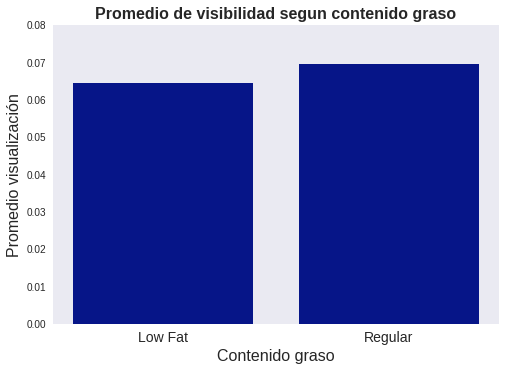

In [ ]:
plt.style.use('seaborn')
plt.bar(df_ventas_clon.groupby(['Item_Fat_Content'])['Item_Visibility'].mean().index,
         df_ventas_clon.groupby(['Item_Fat_Content'])['Item_Visibility'].mean().values,
         fc='#061588')
plt.xlabel('Contenido graso', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Promedio visualización', fontsize=16)
plt.title('Promedio de visibilidad segun contenido graso',fontsize=16,fontweight='bold')
plt.ylim( top=0.08)
plt.grid()

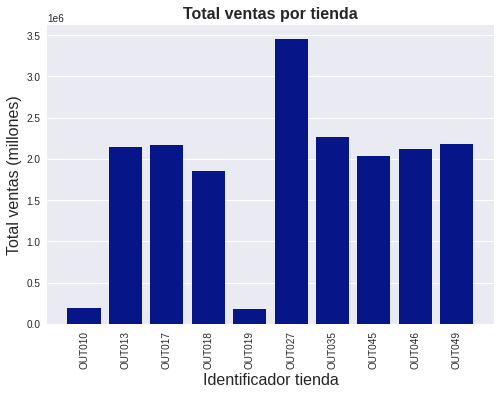

In [ ]:
plt.bar(df_ventas_clon.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().index,
         df_ventas_clon.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().values,
         fc='#061588')
plt.xlabel('Identificador tienda',fontsize=16)
plt.ylabel('Total ventas (millones)',fontsize=16)
plt.title('Total ventas por tienda',fontsize=16, fontweight='bold')
plt.xticks(rotation =90)
plt.grid(axis ='x')

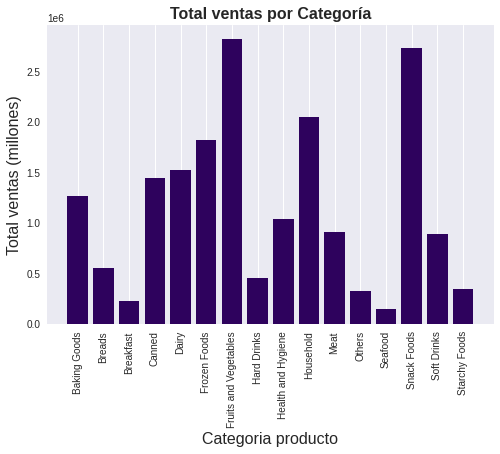

In [ ]:
plt.bar(df_ventas_clon.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,
         df_ventas_clon.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().values,
         fc='#2E025D')
plt.xlabel('Categoria producto',fontsize=16)
plt.ylabel('Total ventas (millones)',fontsize=16)
plt.title('Total ventas por Categoría',fontsize=16, fontweight='bold')
plt.xticks(rotation =90)
plt.grid(axis ='y')

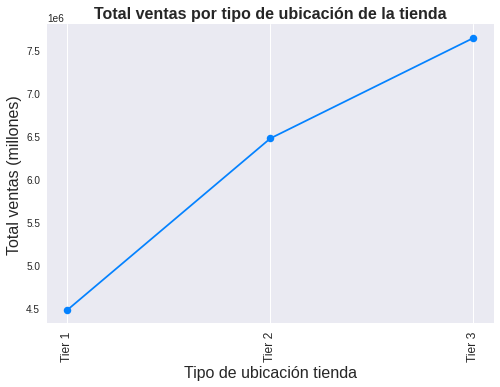

In [ ]:
plt.plot(df_ventas_clon.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum().index,
         df_ventas_clon.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum().values,
         marker='.', markersize=15,
         c='#0482FF')
plt.xlabel('Tipo de ubicación tienda',fontsize=16)
plt.ylabel('Total ventas (millones)',fontsize=16)
plt.title('Total ventas por tipo de ubicación de la tienda',fontsize=16, fontweight='bold')
plt.xticks(rotation =90, fontsize=12)
plt.grid(axis ='y')

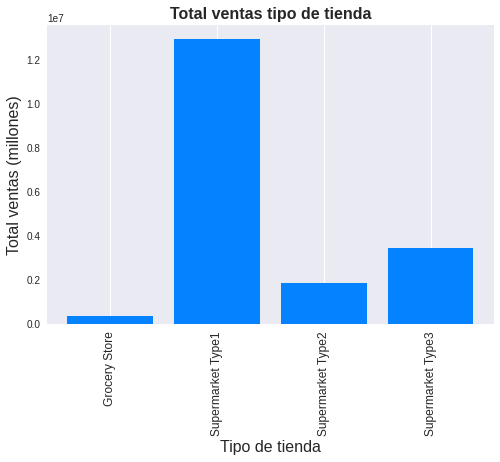

In [ ]:
plt.bar(df_ventas_clon.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().index,
         df_ventas_clon.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().values,
         fc='#0482FF')
plt.xlabel('Tipo de tienda',fontsize=16)
plt.ylabel('Total ventas (millones)',fontsize=16)
plt.title('Total ventas tipo de tienda',fontsize=16, fontweight='bold')
plt.xticks(rotation =90, fontsize=12)
plt.grid(axis ='y')

#**Análisis estadístico**

Trazado de gráficos en base a valores observados, para comprender mejor la información

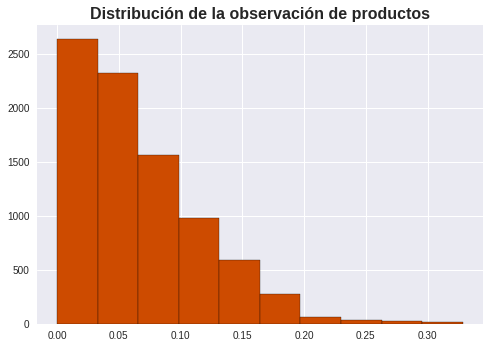

In [ ]:
df_ventas_clon['Item_Visibility'].hist(fc='#CD4B00', edgecolor='k')
plt.title('Distribución de la observación de productos', fontsize=16, fontweight='bold');

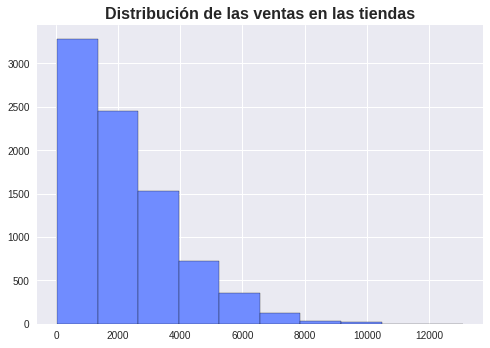

In [ ]:
df_ventas_clon['Item_Outlet_Sales'].hist(fc='#708CFF', edgecolor='k')
plt.title('Distribución de las ventas en las tiendas', fontsize=16, fontweight='bold');

Text(0, 0.5, 'Venta de productos por tienda')

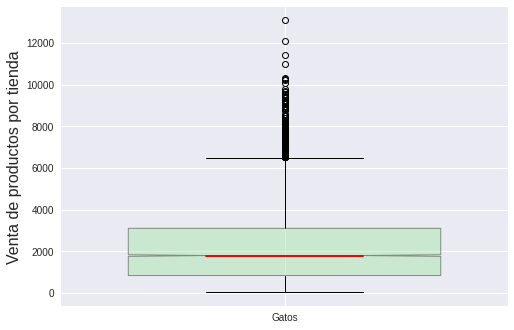

In [ ]:
boxplot = plt.boxplot([df_ventas_clon['Item_Outlet_Sales']], 
            notch=True,
            widths=.7,
            patch_artist=True,
            medianprops=dict(linestyle='-', linewidth=2, color='r'),
            labels=['Ventas'],
            boxprops=dict(linestyle='-', linewidth=1, color='k', facecolor='#9BE39B', alpha=.4))
plt.ylabel('Venta de productos por tienda', fontsize=16)

#**Modelos para predecir**

Uso de varias tecnicas para ajustar los datos a los modelos de regresión lineal y KNN

In [18]:
df_ventas_clon.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012240,0.024839,0.001220,0.014536
Item_Visibility,-0.012240,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024839,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.001220,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014536,-0.128625,0.567574,-0.049135,1.000000


Al tener variables categóricas, no podemos obtener la correlacion de todas las variables.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
df_ventas_clon.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Sin tamaño,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
ids=np.unique(df_ventas_clon['Item_Identifier'])
ids

array(['DRA12', 'DRA24', 'DRA59', ..., 'NCZ42', 'NCZ53', 'NCZ54'],
      dtype=object)

In [ ]:
ile = LabelEncoder()
ids_labels = ile.fit_transform(df_ventas_clon['Item_Identifier'])
ids_mapping = {index: label for index, label in enumerate(ile.classes_)}
ids_mapping

In [ ]:
df_ventas_clon['Item_Identifier'] = ids_labels
